In [1]:
# only adjust settings in this cell
state = 'NC'
root_name = 'Mecklenburg' # which county will root our district (or county_cluster==multi-district)?
k = 14                    # the state has this number of districts
deviation = 1             # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 3                  # size=1 for single district, size=2 for double district, ...
obj_type = 'polsby_popper'# compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 14 districts
We seek a multi-district (county cluster) of size = 3


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 745670
Single district upper population limit U = 745671


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Mecklenburg County to be the root. In our graph, this is vertex # 32


In [6]:
from cluster import enumerate_top_districts
districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 793 rows, 935 columns and 4109 nonzeros
Model fingerprint: 0xec116729
Model has 1 quadratic constraint
Variable types: 491 continuous, 444 integer (444 binary)
Coefficient statistics:
  Matrix range     [7e-04, 1e+06]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+06]
Presolve removed 116 rows and 119 columns
Presolve time: 0.03s
Presolved: 677 rows, 816 columns, 3610 nonzeros
Presolved model has 1 quadratic constraint(s)
Variable types: 474 continuous, 

 784501 212027 infeasible   51               -    5.36608      -  30.0  380s
found district [7, 9, 20, 32, 34, 37, 46, 50, 52, 59, 87, 88, 97] with objective = 10.497687076936268
   added to list!
 797004 214523 infeasible   53               -    5.38764      -  29.9  385s
 807826 216813 infeasible   34               -    5.40610      -  29.9  390s
 817214 218966 infeasible   39               -    5.42149      -  29.9  395s
 827908 221096 infeasible   53               -    5.44172      -  29.8  400s
 836818 222745    6.34237   38    7          -    5.45722      -  29.8  405s
 847599 224939 infeasible   43               -    5.47627      -  29.8  410s
 857196 227015 infeasible   32               -    5.49239      -  29.8  415s
 867333 229272    8.45862   55   26          -    5.50812      -  29.8  420s
 877999 231254 infeasible   60               -    5.52745      -  29.8  425s
 889139 233861    6.01222   36   64          -    5.54587      -  29.8  430s
 899911 235843 infeasible   41   

 1926055 411188    7.87350   42   12          -    6.84569      -  28.4  895s
 1939121 412907   10.40810   38   24          -    6.85933      -  28.4  900s
 1950734 414234   13.16443   51   21          -    6.87123      -  28.4  905s
 1962831 415995    9.26172   45   33          -    6.88239      -  28.4  910s
found district [7, 11, 12, 15, 28, 32, 35, 62, 72, 88, 99] with objective = 7.447036337219725
   added to list!
 1975010 417631 infeasible   38               -    6.89533      -  28.4  915s
found district [7, 12, 20, 23, 32, 37, 50, 57, 59, 62, 67, 81] with objective = 6.900676627707148
   added to list!
 1985783 419172 infeasible   48               -    6.90659      -  28.4  920s
 1997396 420934    8.83931   41   42          -    6.91888      -  28.4  925s
 2008271 422362    7.61042   53   11          -    6.93049      -  28.3  930s
found district [7, 12, 15, 32, 35, 37, 38, 59, 62, 67, 81, 88] with objective = 7.574644134413366
   added to list!
 2019748 423640 infeasible   40 

 2919337 533763 infeasible   44               -    7.75860      -  27.8 1365s
 2928943 534718 infeasible   39               -    7.76668      -  27.8 1370s
found district [2, 10, 13, 18, 22, 23, 28, 32, 36, 47, 50, 61, 69, 72, 73, 82, 83, 92, 98, 99] with objective = 14.170525341591986
   tossing it because it's worse than the others
adding cut saying that objective should be less than 10.751500470271445
 2939246 535445    9.63841   46   67          -    7.77768      -  27.8 1375s
 2951371 536321    9.96995   48   43          -    7.78849      -  27.8 1380s
 2961767 537085    9.51545   40  116          -    7.79831      -  27.7 1385s
 2974280 537734 infeasible   45               -    7.80938      -  27.7 1390s
 2985431 538288    9.36232   48    4          -    7.81963      -  27.7 1395s
 2995173 538630 infeasible   46               -    7.82882      -  27.7 1400s
 3006814 539325 infeasible   47               -    7.83943      -  27.6 1405s
 3018538 540077    8.88995   38   90          

 3955540 577723 infeasible   43               -    8.62750      -  25.9 1845s
 3966725 578134   10.22352   47   30          -    8.63558      -  25.9 1850s
 3979201 578270 infeasible   50               -    8.64487      -  25.9 1855s
 3990167 578342    9.00543   45   27          -    8.65368      -  25.9 1860s
 4002167 578414    9.26278   45   22          -    8.66286      -  25.9 1865s
 4013999 578872 infeasible   65               -    8.67166      -  25.8 1870s
 4024538 578757    8.74605   47   33          -    8.67999      -  25.8 1875s
 4035997 578829 infeasible   34               -    8.68888      -  25.8 1880s
 4046582 578865    9.98305   53   14          -    8.69721      -  25.8 1885s
 4057306 579015 infeasible   57               -    8.70580      -  25.8 1890s
 4066144 579047 infeasible   44               -    8.71226      -  25.7 1895s
 4074184 578774    8.84769   51    7          -    8.71867      -  25.7 1900s
 4083325 578784   10.15580   54   10          -    8.72608      

 5062533 507101    9.84538   61    9          -    9.52296      -  24.0 2355s
 5075105 504773 infeasible   49               -    9.53482      -  24.0 2360s
 5088319 502243 infeasible   41               -    9.54731      -  24.0 2365s
found district [2, 3, 10, 11, 12, 13, 24, 28, 32, 56, 57, 61, 72, 73, 83, 94, 99] with objective = 9.555681746064327
   replaced worse solution with objective = 10.497687076936268
adding cut saying that objective should be less than 10.27489846475555
 5101482 499205 infeasible   63               -    9.56030      -  23.9 2370s
 5117412 494769 infeasible   46               -    9.57761      -  23.9 2375s
 5132725 490525    9.76032   60    5          -    9.59413      -  23.9 2380s
 5148731 486323   10.11161   43   21          -    9.61126      -  23.8 2385s
 5163357 481919 infeasible   51               -    9.62734      -  23.8 2390s
 5177768 477520 infeasible   47               -    9.64407      -  23.8 2395s
 5193677 473107 infeasible   68               -

In no particular order, the top 10 clusters are:


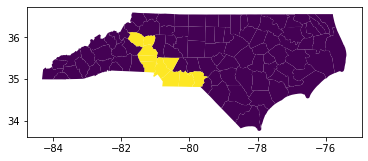

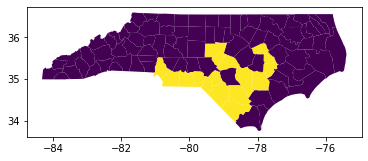

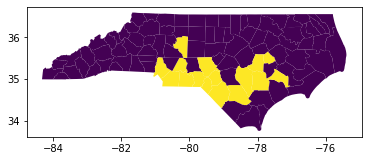

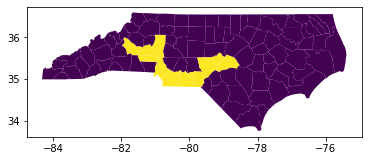

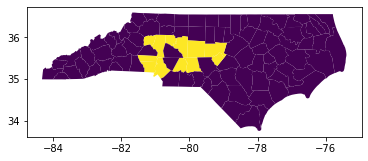

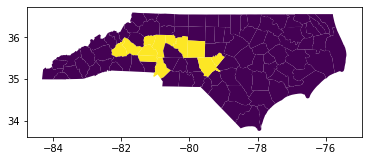

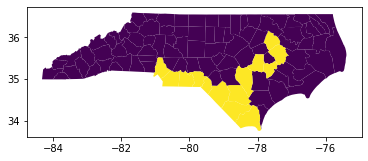

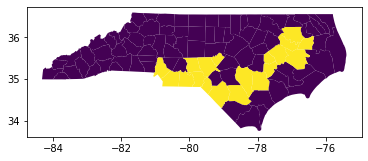

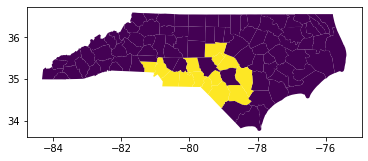

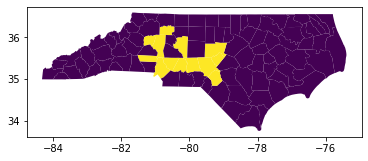

In [7]:
# Draw the districting plans
from cluster import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top 10 clusters are:")
for p in range(len(districts)):
    draw_single_district( filepath, filename, G, districts[p], zoom=False )